# 1. Data Exploration

In [1]:
from collections import Counter, defaultdict

from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
STOCK_NEWS_DATASET_FILE = "../data/aapl_us_equities_news.csv"

TEXT_START = "\033[1m"
TEXT_END = "\033[0m"

## 1.1 Load data

In [3]:
%%time
df_aapl_us_equities_news = pd.read_csv(STOCK_NEWS_DATASET_FILE)

CPU times: user 4.56 s, sys: 297 ms, total: 4.85 s
Wall time: 4.85 s


## 1.2 Inspect data

**Inspect data types**

In [4]:
df_aapl_us_equities_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196867 entries, 0 to 196866
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          196867 non-null  int64  
 1   ticker      196867 non-null  object 
 2   title       196867 non-null  object 
 3   category    196867 non-null  object 
 4   content     196859 non-null  object 
 5   date        196867 non-null  object 
 6   provider    196867 non-null  object 
 7   url         196867 non-null  object 
 8   article_id  196867 non-null  int64  
 9   open        196867 non-null  float64
 10  high        196867 non-null  float64
 11  low         196867 non-null  float64
 12  close       196867 non-null  float64
 13  adj_close   196867 non-null  float64
 14  volume      196867 non-null  int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 22.5+ MB


**Inspect missing rows**

In [5]:
percent_missing = df_aapl_us_equities_news.isnull().sum() * 100 / len(df_aapl_us_equities_news)

df_aapl_us_equities_news_missing_data = pd.DataFrame({"PERCENT_MISSING": percent_missing}, index=df_aapl_us_equities_news.columns)
df_aapl_us_equities_news_missing_data

,PERCENT_MISSING
id,0.000000
ticker,0.000000
title,0.000000
category,0.000000
content,0.004064
date,0.000000
provider,0.000000
url,0.000000
article_id,0.000000
open,0.000000


**Inspect basic statistics**

In [6]:
df_aapl_us_equities_news.describe(include="all")

,id,ticker,title,category,content,date,provider,url,article_id,open,high,low,close,adj_close,volume
count,196867.000000,196867,196867,196867,196859,196867,196867,196867,1.968670e+05,196867.000000,196867.000000,196867.000000,196867.000000,196867.000000,1.968670e+05
unique,NaN,801,191227,2,196392,2596,937,196867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AAPL,Day Ahead Top 3 Things to Watch,opinion,EquitiesAsian market closed mixed on Wednesday...,2020-01-30,Zacks Investment Research,https://www.investing.com/news/forex-news/upda...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17648,201,107928,17,505,75686,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,332508.605780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.192562e+07,40.202380,40.569705,39.858996,40.235868,38.423613,1.725696e+08
std,64144.529735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.933611e+07,15.232088,15.379949,15.123855,15.277719,15.486908,1.448628e+08
min,221515.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.217000e+03,2.835357,2.928571,2.792857,2.792857,2.384630,4.544800e+07
25%,276698.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.637485e+05,28.417500,28.639999,28.157499,28.395000,26.281067,9.485880e+07
50%,332762.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.995948e+06,40.759998,41.130001,40.090000,40.757500,38.886185,1.262868e+08
75%,388254.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.003025e+08,48.697498,49.197498,48.285000,48.552502,47.317413,1.832496e+08


**Inspect first rows**

In [7]:
df_aapl_us_equities_news.head()

,id,ticker,title,category,content,date,provider,url,article_id,open,high,low,close,adj_close,volume
0,292541,BAC,UPDATE 4 Rouble at record low as Russia faces ...,news,Updates with day s interventions and futures ...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/upda...,20872,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
1,388968,BBY,UPDATE 4 DSG to cut more costs as sales fall w...,news,Xmas lfl sales down 10 percent gross margin...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/upda...,20724,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
2,342945,NYT,Lack of fame aids Geithner over US tax mistake,news,By Matthew Bigg\n ATLANTA Jan 15 Reuters ...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/lack...,20995,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
3,326167,TGT,CORRECTED Depression ahead prepare for stoc...,news,Corrects figure in paragraph 3 \n LONDON Jan...,2009-01-15,Reuters,https://www.investing.com/news/forex-news/corr...,20779,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000
4,326166,TGT,Euro area CPI Falls Down To 1 6 In December,news,Release Explanation The CPI measures the aver...,2009-01-15,LFB Forex,https://www.investing.com/news/forex-news/euro...,20745,2.8775,3.004286,2.858929,2.977857,2.542589,1831634000


## 1.3 Clean data

**Remove duplicates**

In [8]:
print(f"Rows (Before): {df_aapl_us_equities_news.shape[0]}")
df_aapl_us_equities_news = df_aapl_us_equities_news.drop_duplicates()
print(f"Rows (After): {df_aapl_us_equities_news.shape[0]}")

Rows (Before): 196867
Rows (After): 196867


**Remove null values**

In [9]:
print(f"Rows (Before): {df_aapl_us_equities_news.shape[0]}")
df_aapl_us_equities_news = df_aapl_us_equities_news[df_aapl_us_equities_news["content"].isnull() == False]
print(f"Rows (After): {df_aapl_us_equities_news.shape[0]}")

Rows (Before): 196867
Rows (After): 196859


**Remove unused columnes**

In [10]:
df_aapl_us_equities_news = df_aapl_us_equities_news.drop(columns=["article_id"])

**Reset index**

In [11]:
df_aapl_us_equities_news = df_aapl_us_equities_news.reset_index(drop=True)

**Set data types**

In [12]:
df_aapl_us_equities_news["id"] = df_aapl_us_equities_news["id"].astype(int)
df_aapl_us_equities_news["ticker"] = df_aapl_us_equities_news["ticker"].astype("category")
df_aapl_us_equities_news["title"] = df_aapl_us_equities_news["title"].astype(str)
df_aapl_us_equities_news["category"] = df_aapl_us_equities_news["category"].astype("category")
df_aapl_us_equities_news["content"] = df_aapl_us_equities_news["content"].astype(str)
df_aapl_us_equities_news["date"] = pd.to_datetime(df_aapl_us_equities_news["date"])
df_aapl_us_equities_news["provider"] = df_aapl_us_equities_news["provider"].astype("category")
df_aapl_us_equities_news["url"] = df_aapl_us_equities_news["url"].astype(str)
df_aapl_us_equities_news["open"] = df_aapl_us_equities_news["open"].astype(float)
df_aapl_us_equities_news["high"] = df_aapl_us_equities_news["high"].astype(float)
df_aapl_us_equities_news["low"] = df_aapl_us_equities_news["low"].astype(float)
df_aapl_us_equities_news["close"] = df_aapl_us_equities_news["close"].astype(float)
df_aapl_us_equities_news["adj_close"] = df_aapl_us_equities_news["adj_close"].astype(float)
df_aapl_us_equities_news["volume"] = df_aapl_us_equities_news["volume"].astype(int)

## 1.4 Subset data

In [13]:
df_aapl_us_equities_news_subset = df_aapl_us_equities_news[df_aapl_us_equities_news["ticker"] == "AAPL"]

**Inspect data types**

In [14]:
df_aapl_us_equities_news_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17648 entries, 8491 to 194139
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         17648 non-null  int64         
 1   ticker     17648 non-null  category      
 2   title      17648 non-null  object        
 3   category   17648 non-null  category      
 4   content    17648 non-null  object        
 5   date       17648 non-null  datetime64[ns]
 6   provider   17648 non-null  category      
 7   url        17648 non-null  object        
 8   open       17648 non-null  float64       
 9   high       17648 non-null  float64       
 10  low        17648 non-null  float64       
 11  close      17648 non-null  float64       
 12  adj_close  17648 non-null  float64       
 13  volume     17648 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(5), int64(2), object(3)
memory usage: 1.8+ MB


**Inspect basic statistics**

In [15]:
df_aapl_us_equities_news_subset.describe(include="all")

/tmp/ipykernel_212106/3212651083.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_aapl_us_equities_news_subset.describe(include="all")


,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume
count,17648.000000,17648,17648,17648,17648,17648,17648,17648,17648.000000,17648.000000,17648.000000,17648.000000,17648.000000,1.764800e+04
unique,NaN,1,17512,2,17624,1740,416,17648,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,AAPL,Top 5 things to watch today,opinion,For Immediate Release Chicago IL May 1 ...,2019-11-04 00:00:00,Zacks Investment Research,https://www.investing.com/analysis/waiting-for...,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,17648,13,11418,3,116,7711,1,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2012-07-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2020-01-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,280640.533602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.006476,41.395343,40.647709,41.040853,39.182491,1.607326e+08
std,5773.150898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.423158,12.537988,12.354624,12.468126,12.736599,1.157865e+08
min,270698.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.856071,14.271429,13.753571,13.947500,12.084599,4.544800e+07
25%,275622.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.215000,32.544998,32.035000,32.192501,29.274046,9.648600e+07


**Inspect first rows**

In [16]:
df_aapl_us_equities_news_subset.head()

,id,ticker,title,category,content,date,provider,url,open,high,low,close,adj_close,volume
8491,290924,AAPL,Waiting For Direction On The Markets,opinion,This stock market has been a difficult one for...,2012-07-16,Cam Hui,https://www.investing.com/analysis/waiting-for...,21.611429,21.843571,21.607857,21.675358,18.507113,301260400
8546,290925,AAPL,Mid Year Update U S And Canadian Stock Marke...,opinion,From 2004 to 2010 the TSX 300 Index of leading...,2012-07-19,Baskin Financial Blog,https://www.investing.com/analysis/mid-year-up...,21.831429,21.976786,21.642857,21.940001,18.733074,436861600
8591,290928,AAPL,Trade Apple After Earnings,opinion,It may look like a spider web but the mishmas...,2012-07-23,Abigail Doolittle,https://www.investing.com/analysis/trade-apple...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600
8592,290927,AAPL,Apple Earnings Preview Quarterly Dip On Deck,opinion,Last quarter Apple AAPL reported the 2nd bes...,2012-07-23,David Dyer,https://www.investing.com/analysis/apple-earni...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600
8593,290926,AAPL,Summer Heat Scorches Europe And U S,opinion,Europe flares as summer heat continues Summer...,2012-07-23,John Nyaradi,https://www.investing.com/analysis/summer-heat...,21.228571,21.639286,20.989643,21.565357,18.413191,487975600


## 1.5 Plot data

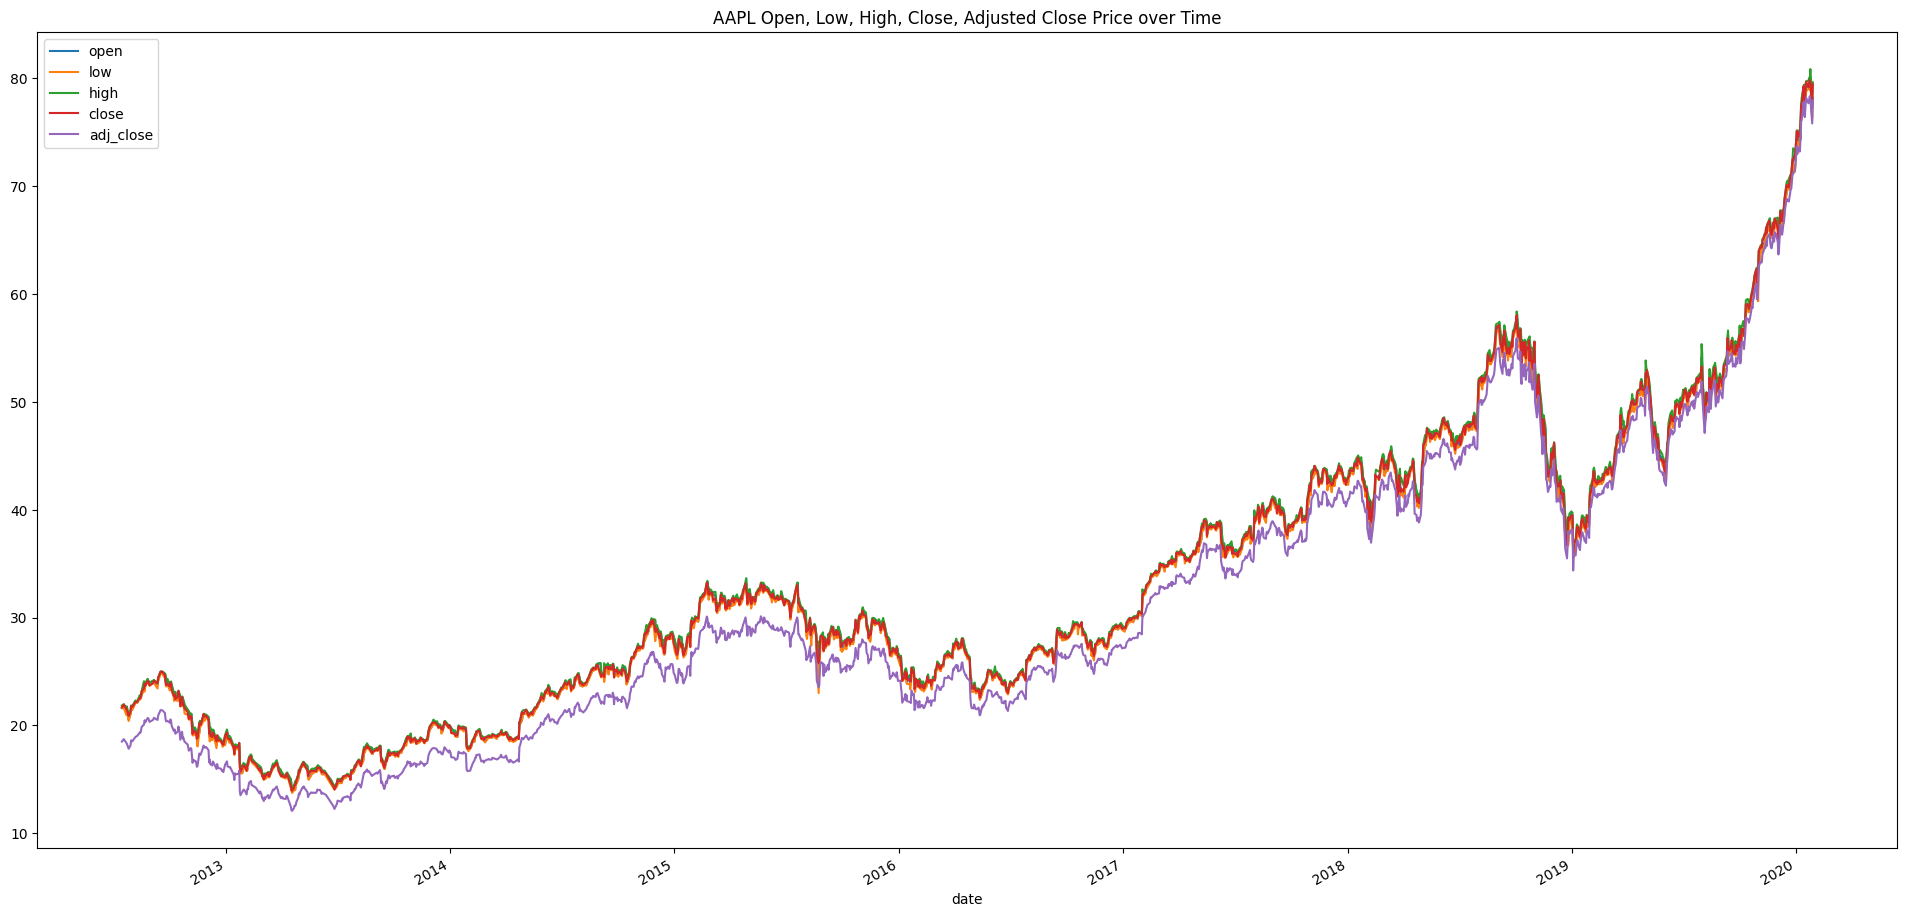

In [17]:
_ = df_aapl_us_equities_news_subset.plot(
    x="date",
    y=["open","low","high","close", "adj_close"],
    kind="line",
    title="AAPL Open, Low, High, Close, Adjusted Close Price over Time",
    figsize=(24, 12),
)

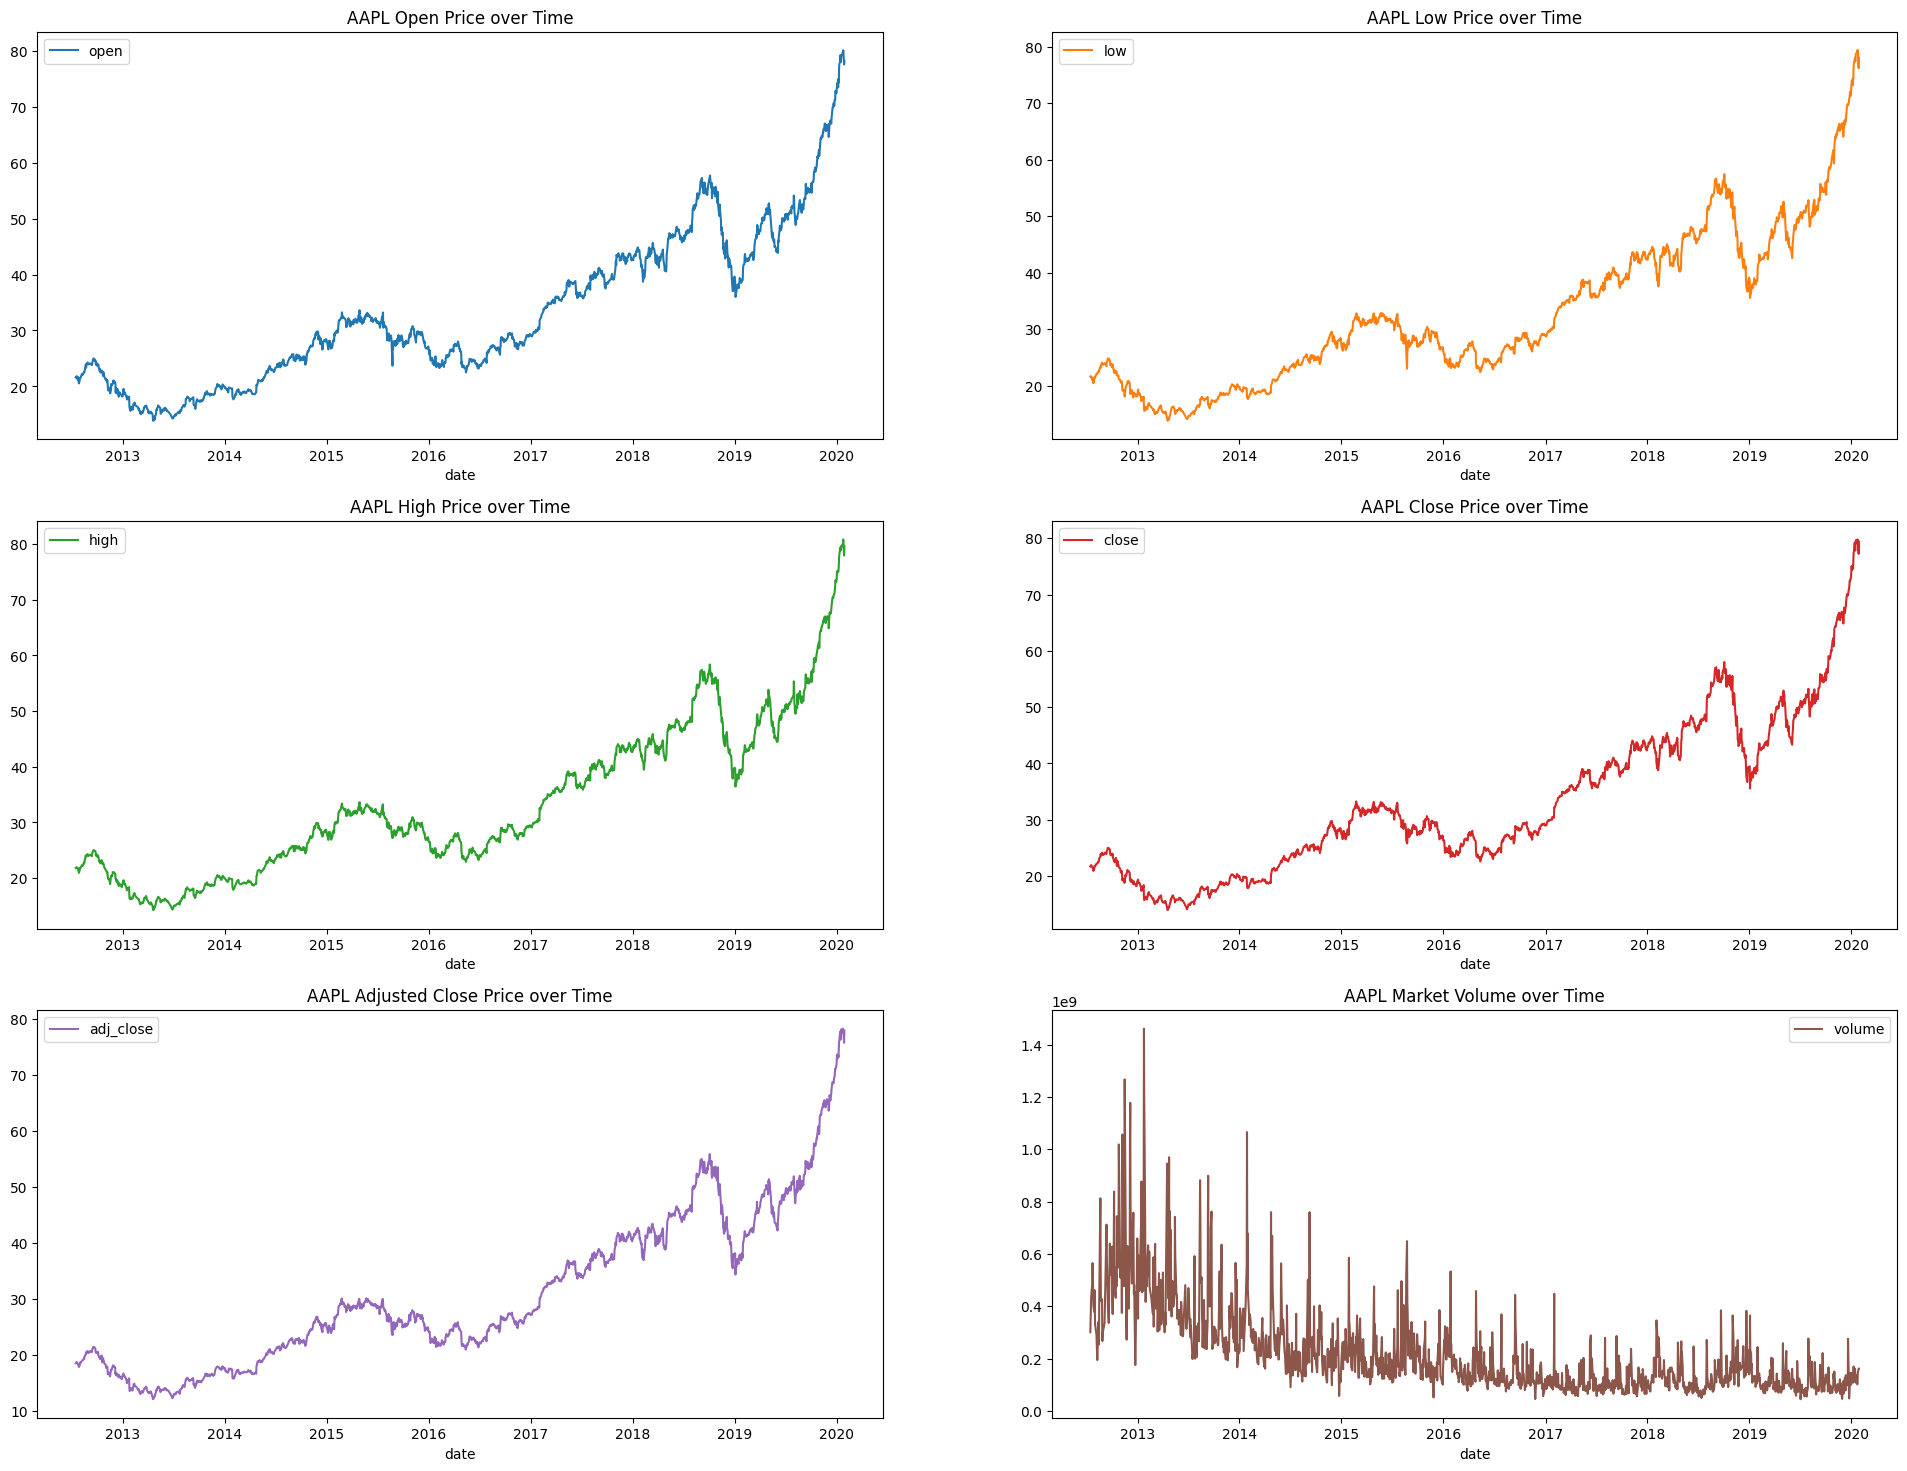

In [18]:
_ = df_aapl_us_equities_news_subset.plot(
    x="date",
    y=["open","low","high","close", "adj_close", "volume"],
    kind="line",
    title=[
        "AAPL Open Price over Time",
        "AAPL Low Price over Time",
        "AAPL High Price over Time",
        "AAPL Close Price over Time",
        "AAPL Adjusted Close Price over Time",
        "AAPL Market Volume over Time",
    ],
    figsize=(24, 18),
    layout=(3, 2),
    subplots=True,
    sharex=False,
)

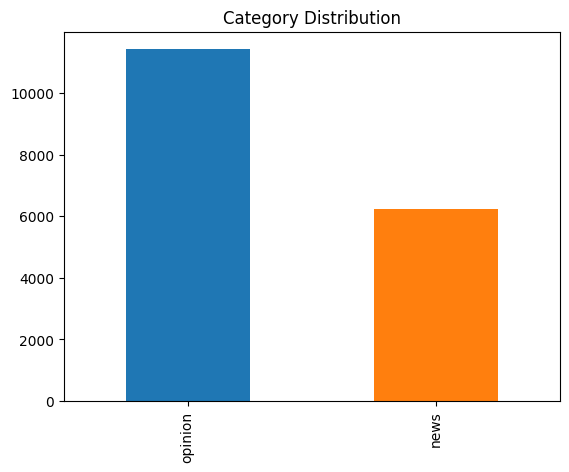

In [19]:
_ = df_aapl_us_equities_news_subset["category"].value_counts().plot(
    kind="bar",
    color=["tab:blue", "tab:orange"],
    title="Category Distribution"
)

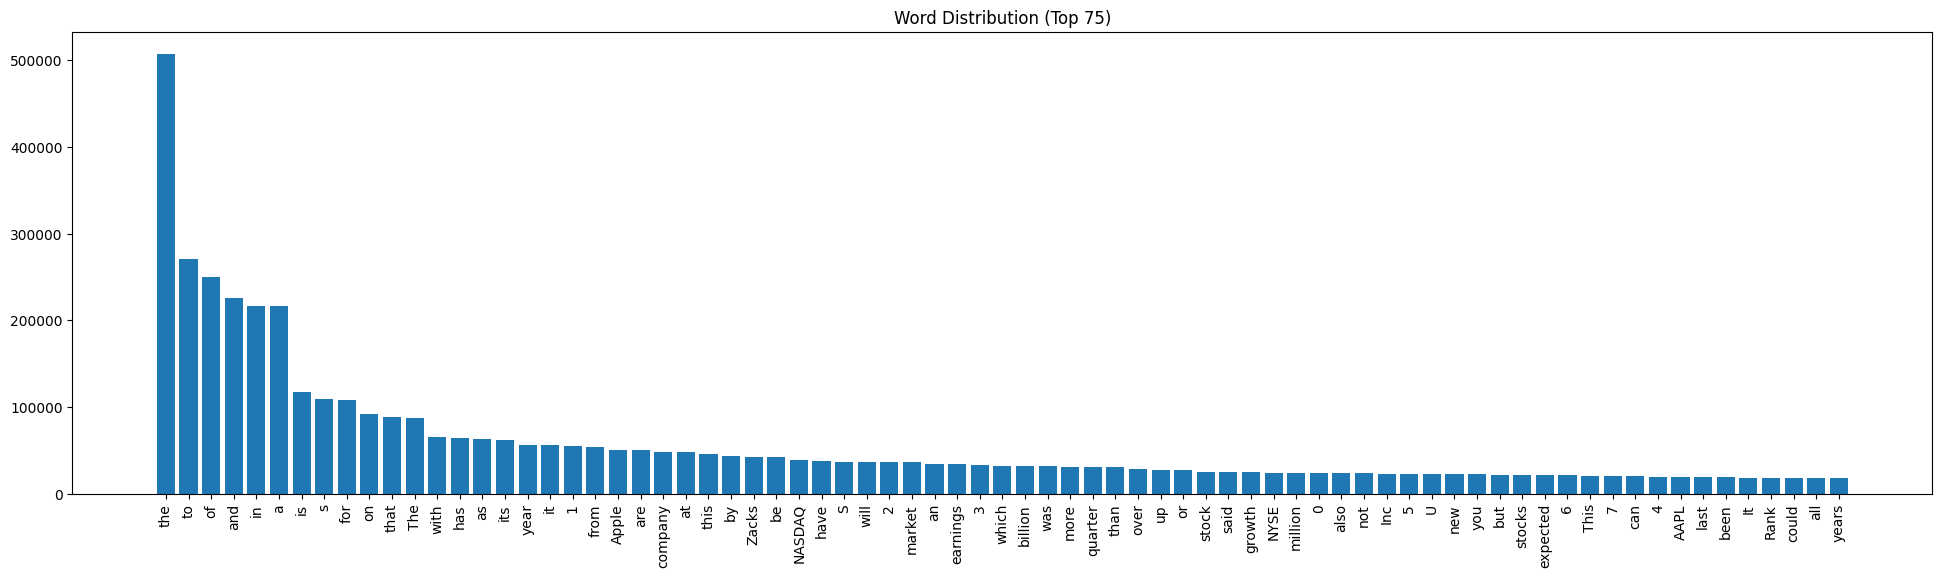

In [20]:
word_counter = Counter([word for word_list in df_aapl_us_equities_news_subset["content"].apply(word_tokenize) for word in word_list])

x, y = zip(*word_counter.most_common(75))

plt.figure(figsize=(24, 6))
plt.bar(x, y)
plt.title("Word Distribution (Top 75)")
plt.xticks(rotation=90)
plt.show()

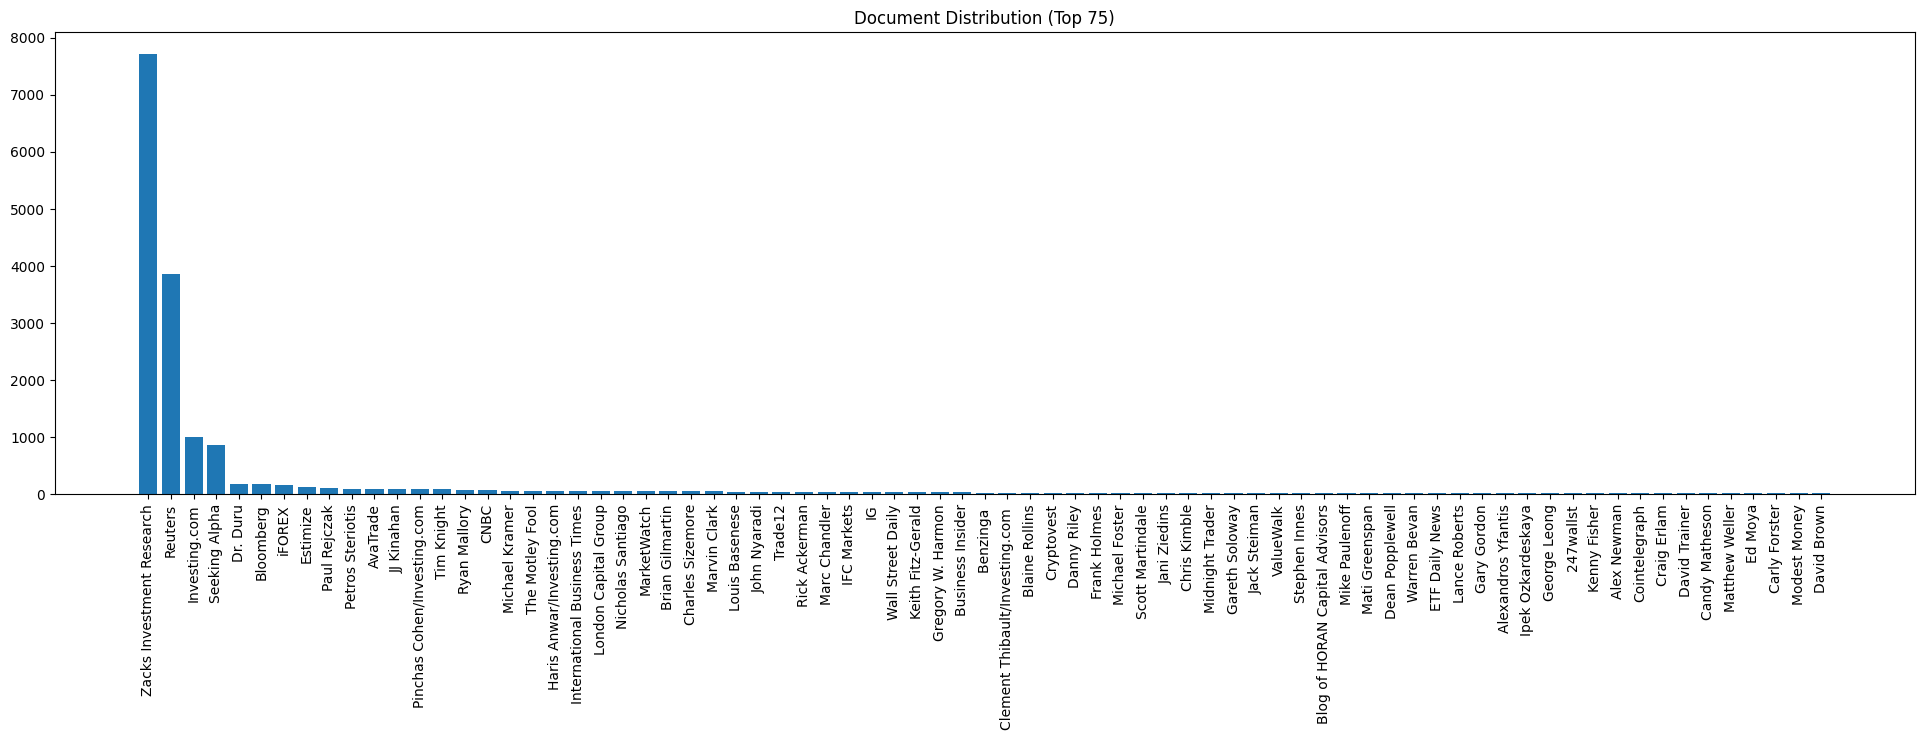

In [21]:
document_counter = Counter(df_aapl_us_equities_news_subset["provider"].value_counts().to_dict())

x, y = zip(*document_counter.most_common(75))

plt.figure(figsize=(24, 6))
plt.bar(x, y)
plt.title("Document Distribution (Top 75)")
plt.xticks(rotation=90)
plt.show()

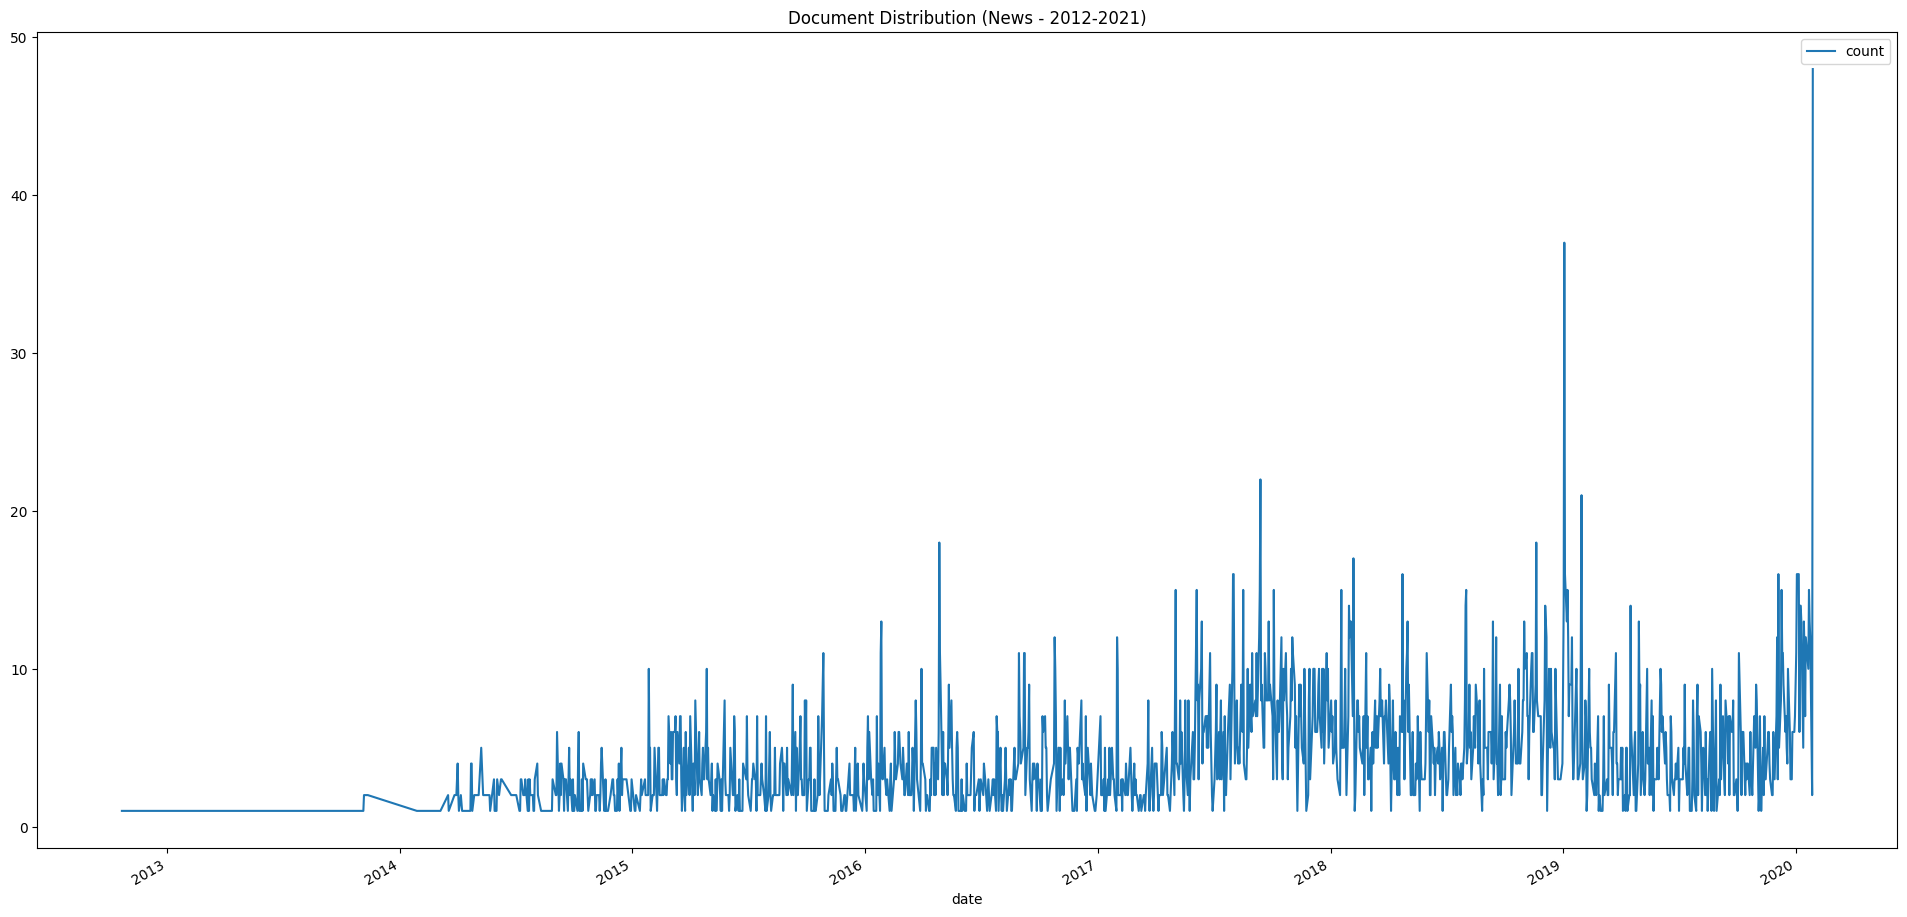

In [22]:
news_distribution = df_aapl_us_equities_news_subset[df_aapl_us_equities_news_subset["category"] == "news"].groupby("date").agg({"id": "count"}).rename(columns={"id": "count"})

_ = news_distribution.plot(
    kind="line",
    title="Document Distribution (News - 2012-2021)",
    figsize=(24, 12),
)

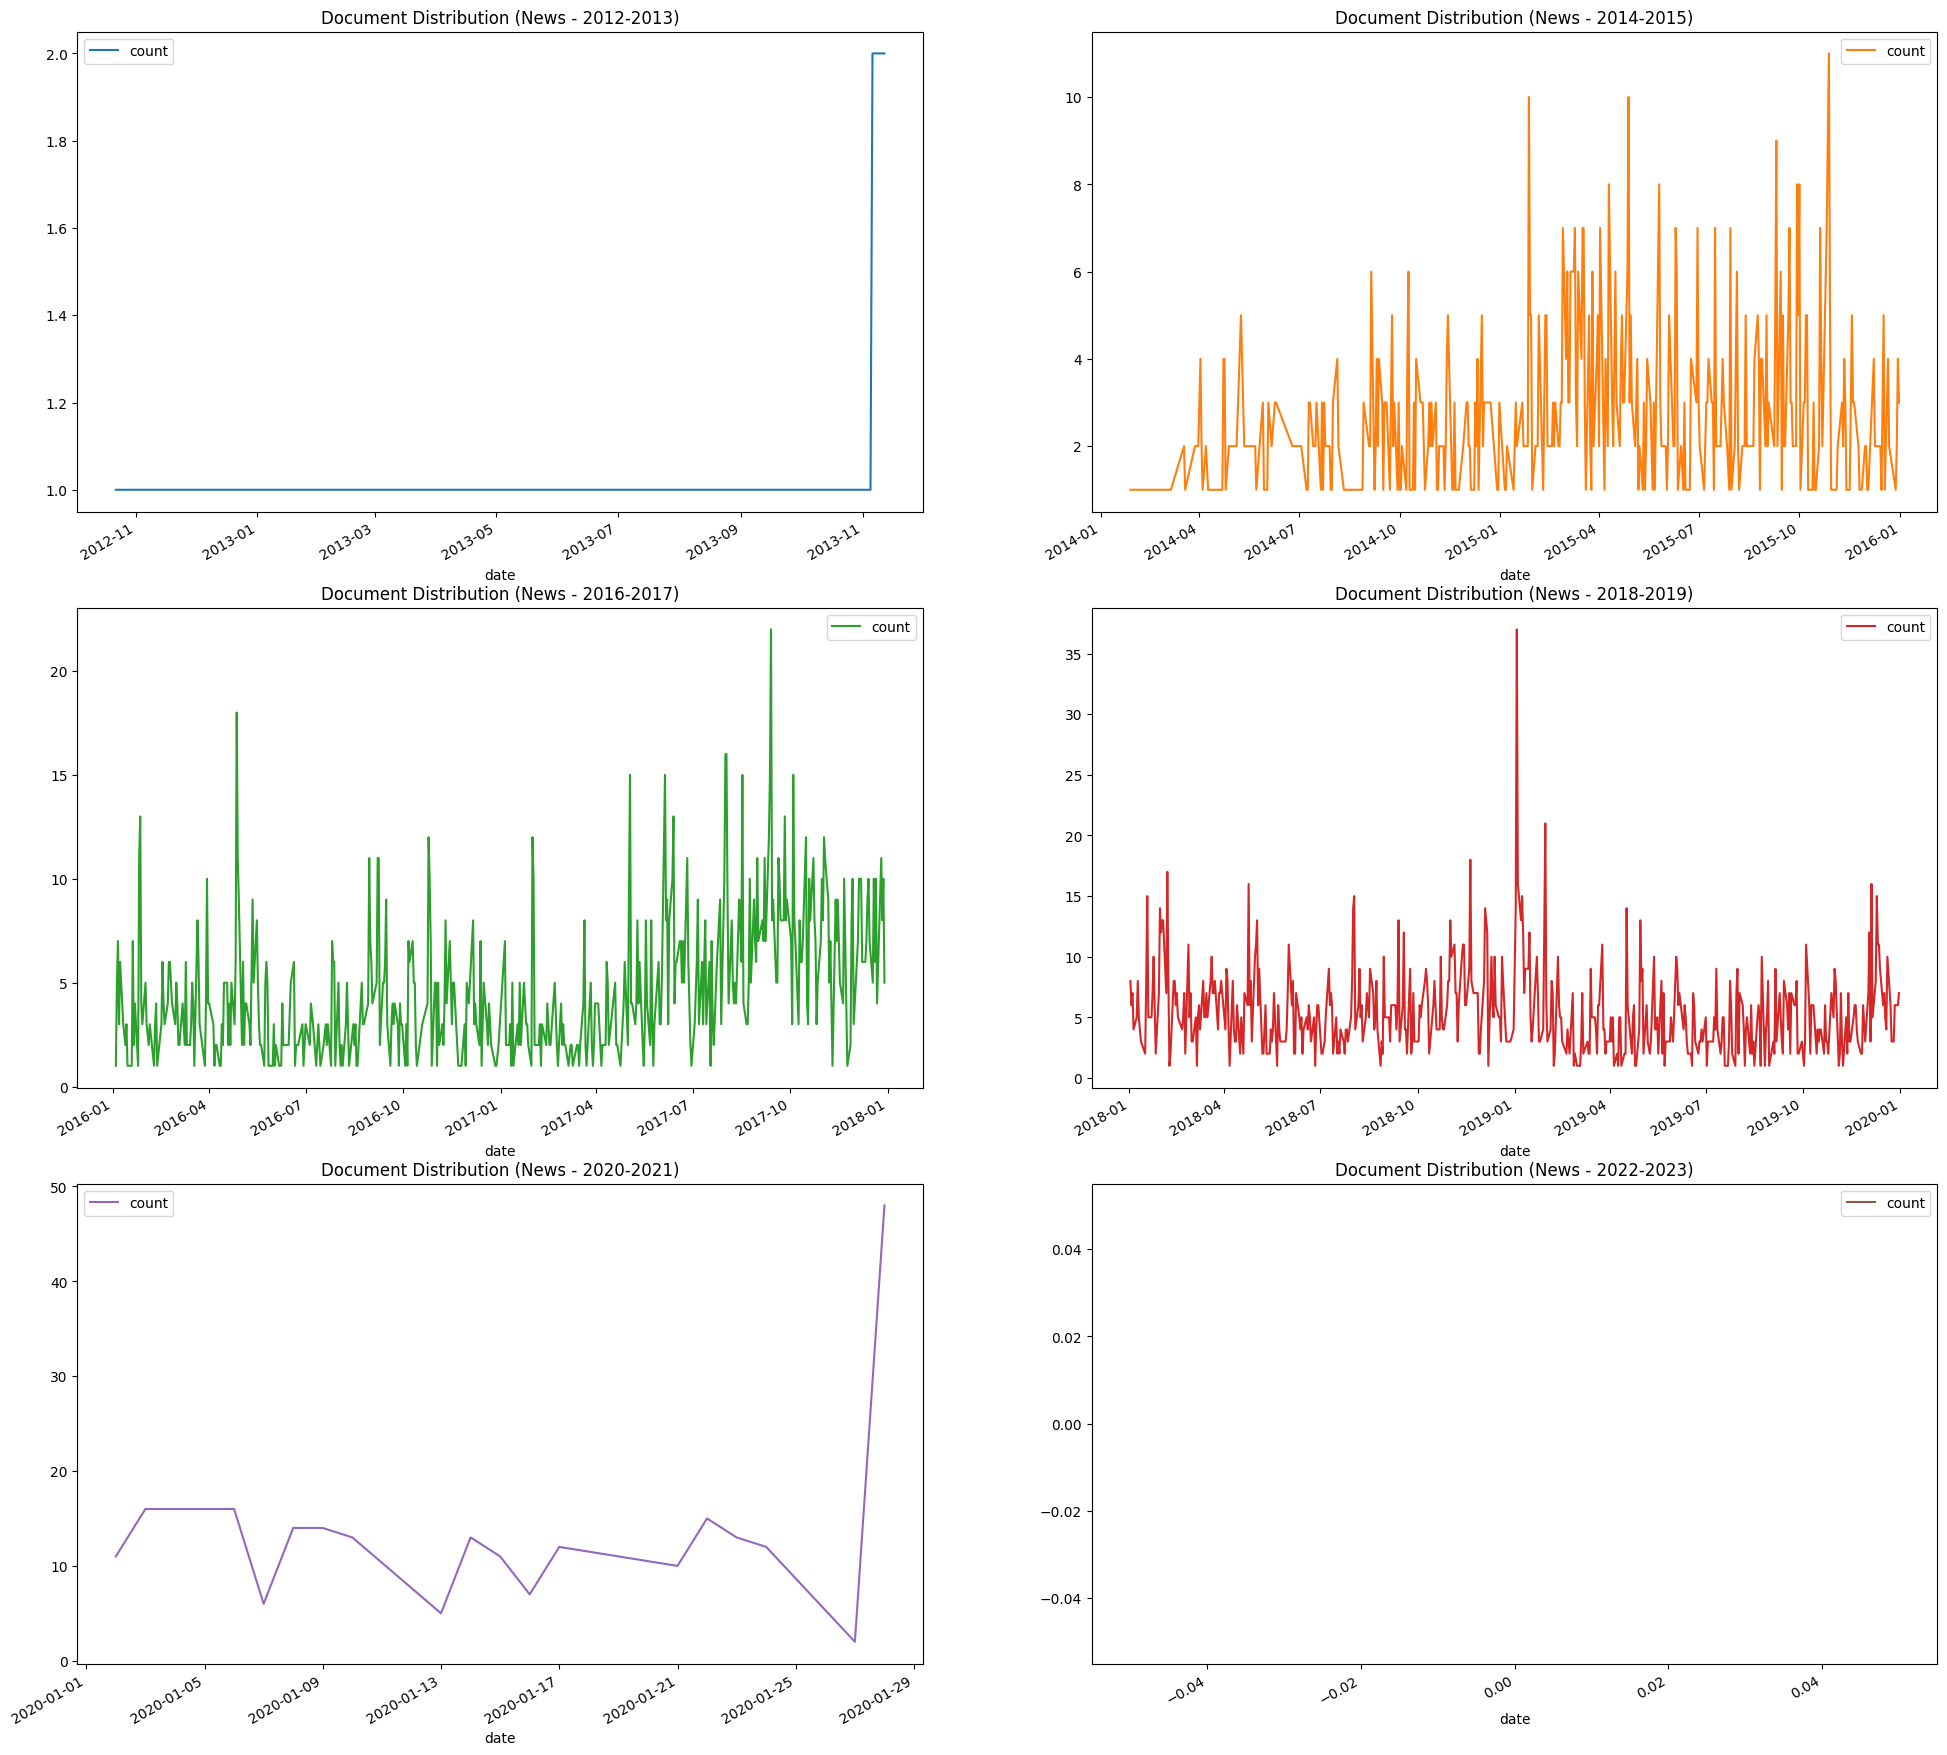

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))

_ = news_distribution[(news_distribution.index >= "2012-01-01") & (news_distribution.index <= "2013-12-31")].plot(
    kind="line",
    ax=axes[0, 0],
    color="tab:blue",
    title="Document Distribution (News - 2012-2013)",
)

_ = news_distribution[(news_distribution.index >= "2014-01-01") & (news_distribution.index <= "2015-12-31")].plot(
    kind="line",
    ax=axes[0, 1],
    color="tab:orange",
    title="Document Distribution (News - 2014-2015)",
)

_ = news_distribution[(news_distribution.index >= "2016-01-01") & (news_distribution.index <= "2017-12-31")].plot(
    kind="line",
    ax=axes[1, 0],
    color="tab:green",
    title="Document Distribution (News - 2016-2017)",
)

_ = news_distribution[(news_distribution.index >= "2018-01-01") & (news_distribution.index <= "2019-12-31")].plot(
    kind="line",
    ax=axes[1, 1],
    color="tab:red",
    title="Document Distribution (News - 2018-2019)",
)

_ = news_distribution[(news_distribution.index >= "2020-01-01") & (news_distribution.index <= "2021-12-31")].plot(
    kind="line",
    ax=axes[2, 0],
    color="tab:purple",
    title="Document Distribution (News - 2020-2021)",
)

_ = news_distribution[(news_distribution.index >= "2022-01-01") & (news_distribution.index <= "2023-12-31")].plot(
    kind="line",
    ax=axes[2, 1],
    color="tab:brown",
    title="Document Distribution (News - 2022-2023)",
)

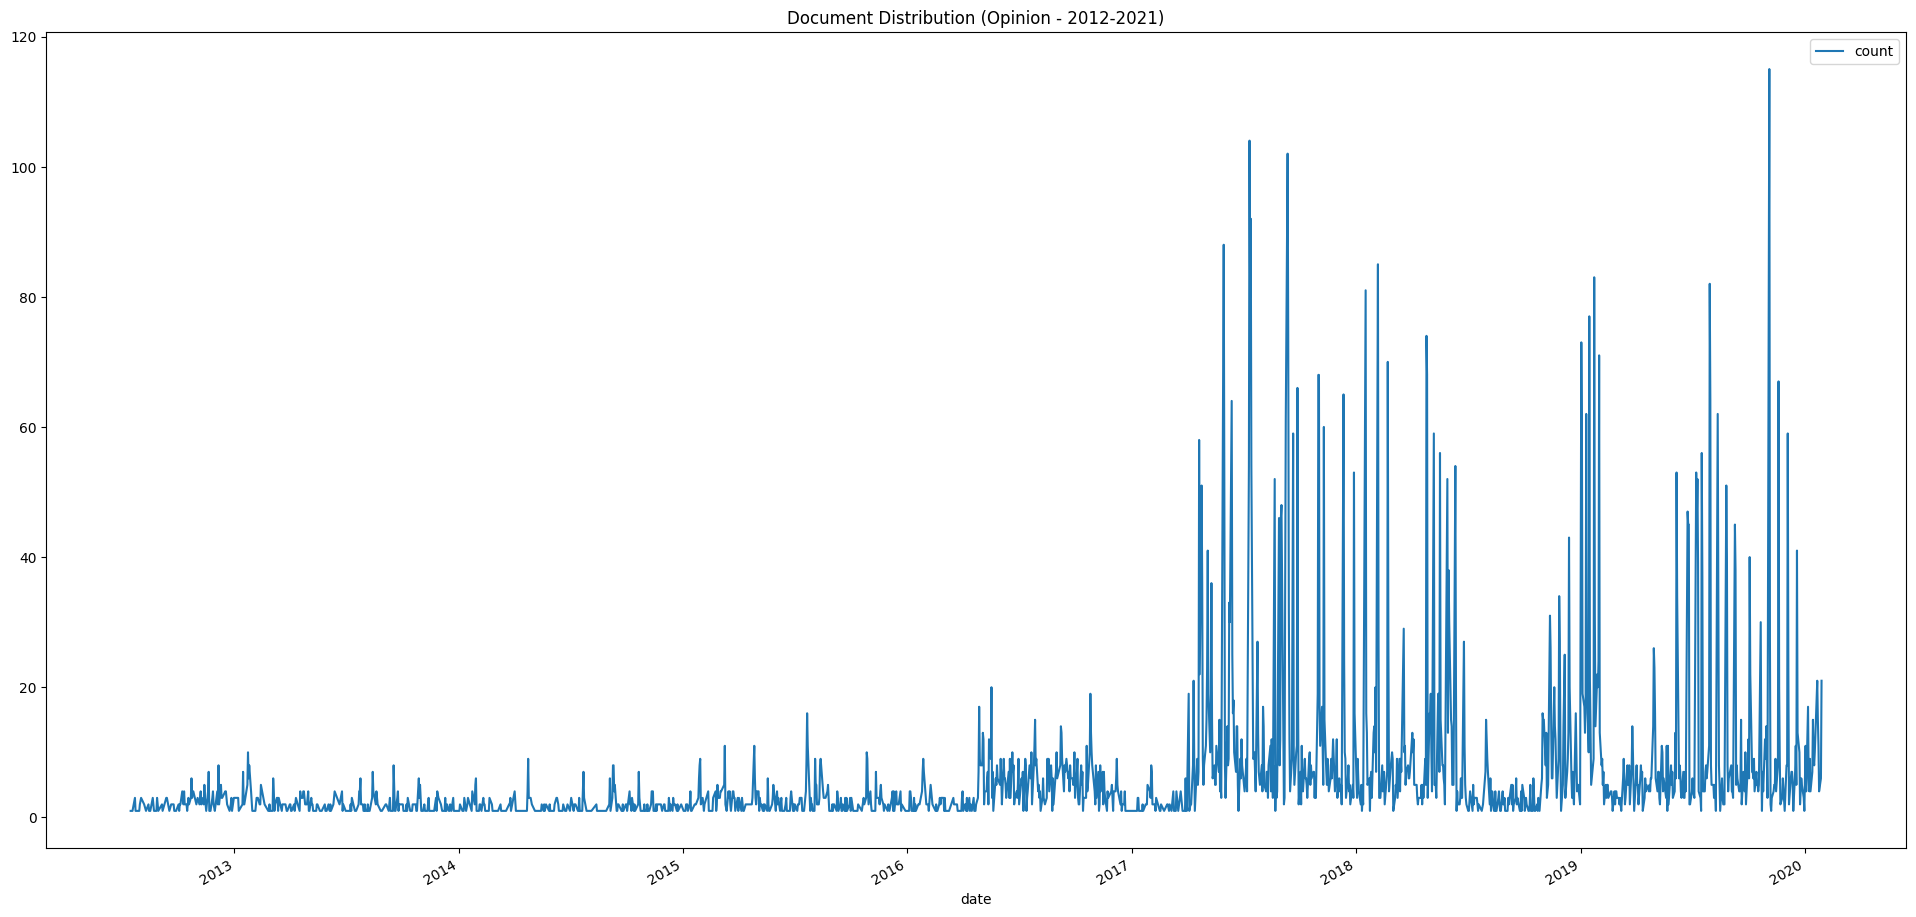

In [24]:
opinion_distribution = df_aapl_us_equities_news_subset[df_aapl_us_equities_news_subset["category"] == "opinion"].groupby("date").agg({"id": "count"}).rename(columns={"id": "count"})

_ = opinion_distribution.plot(
    kind="line",
    title="Document Distribution (Opinion - 2012-2021)",
    figsize=(24, 12),
)

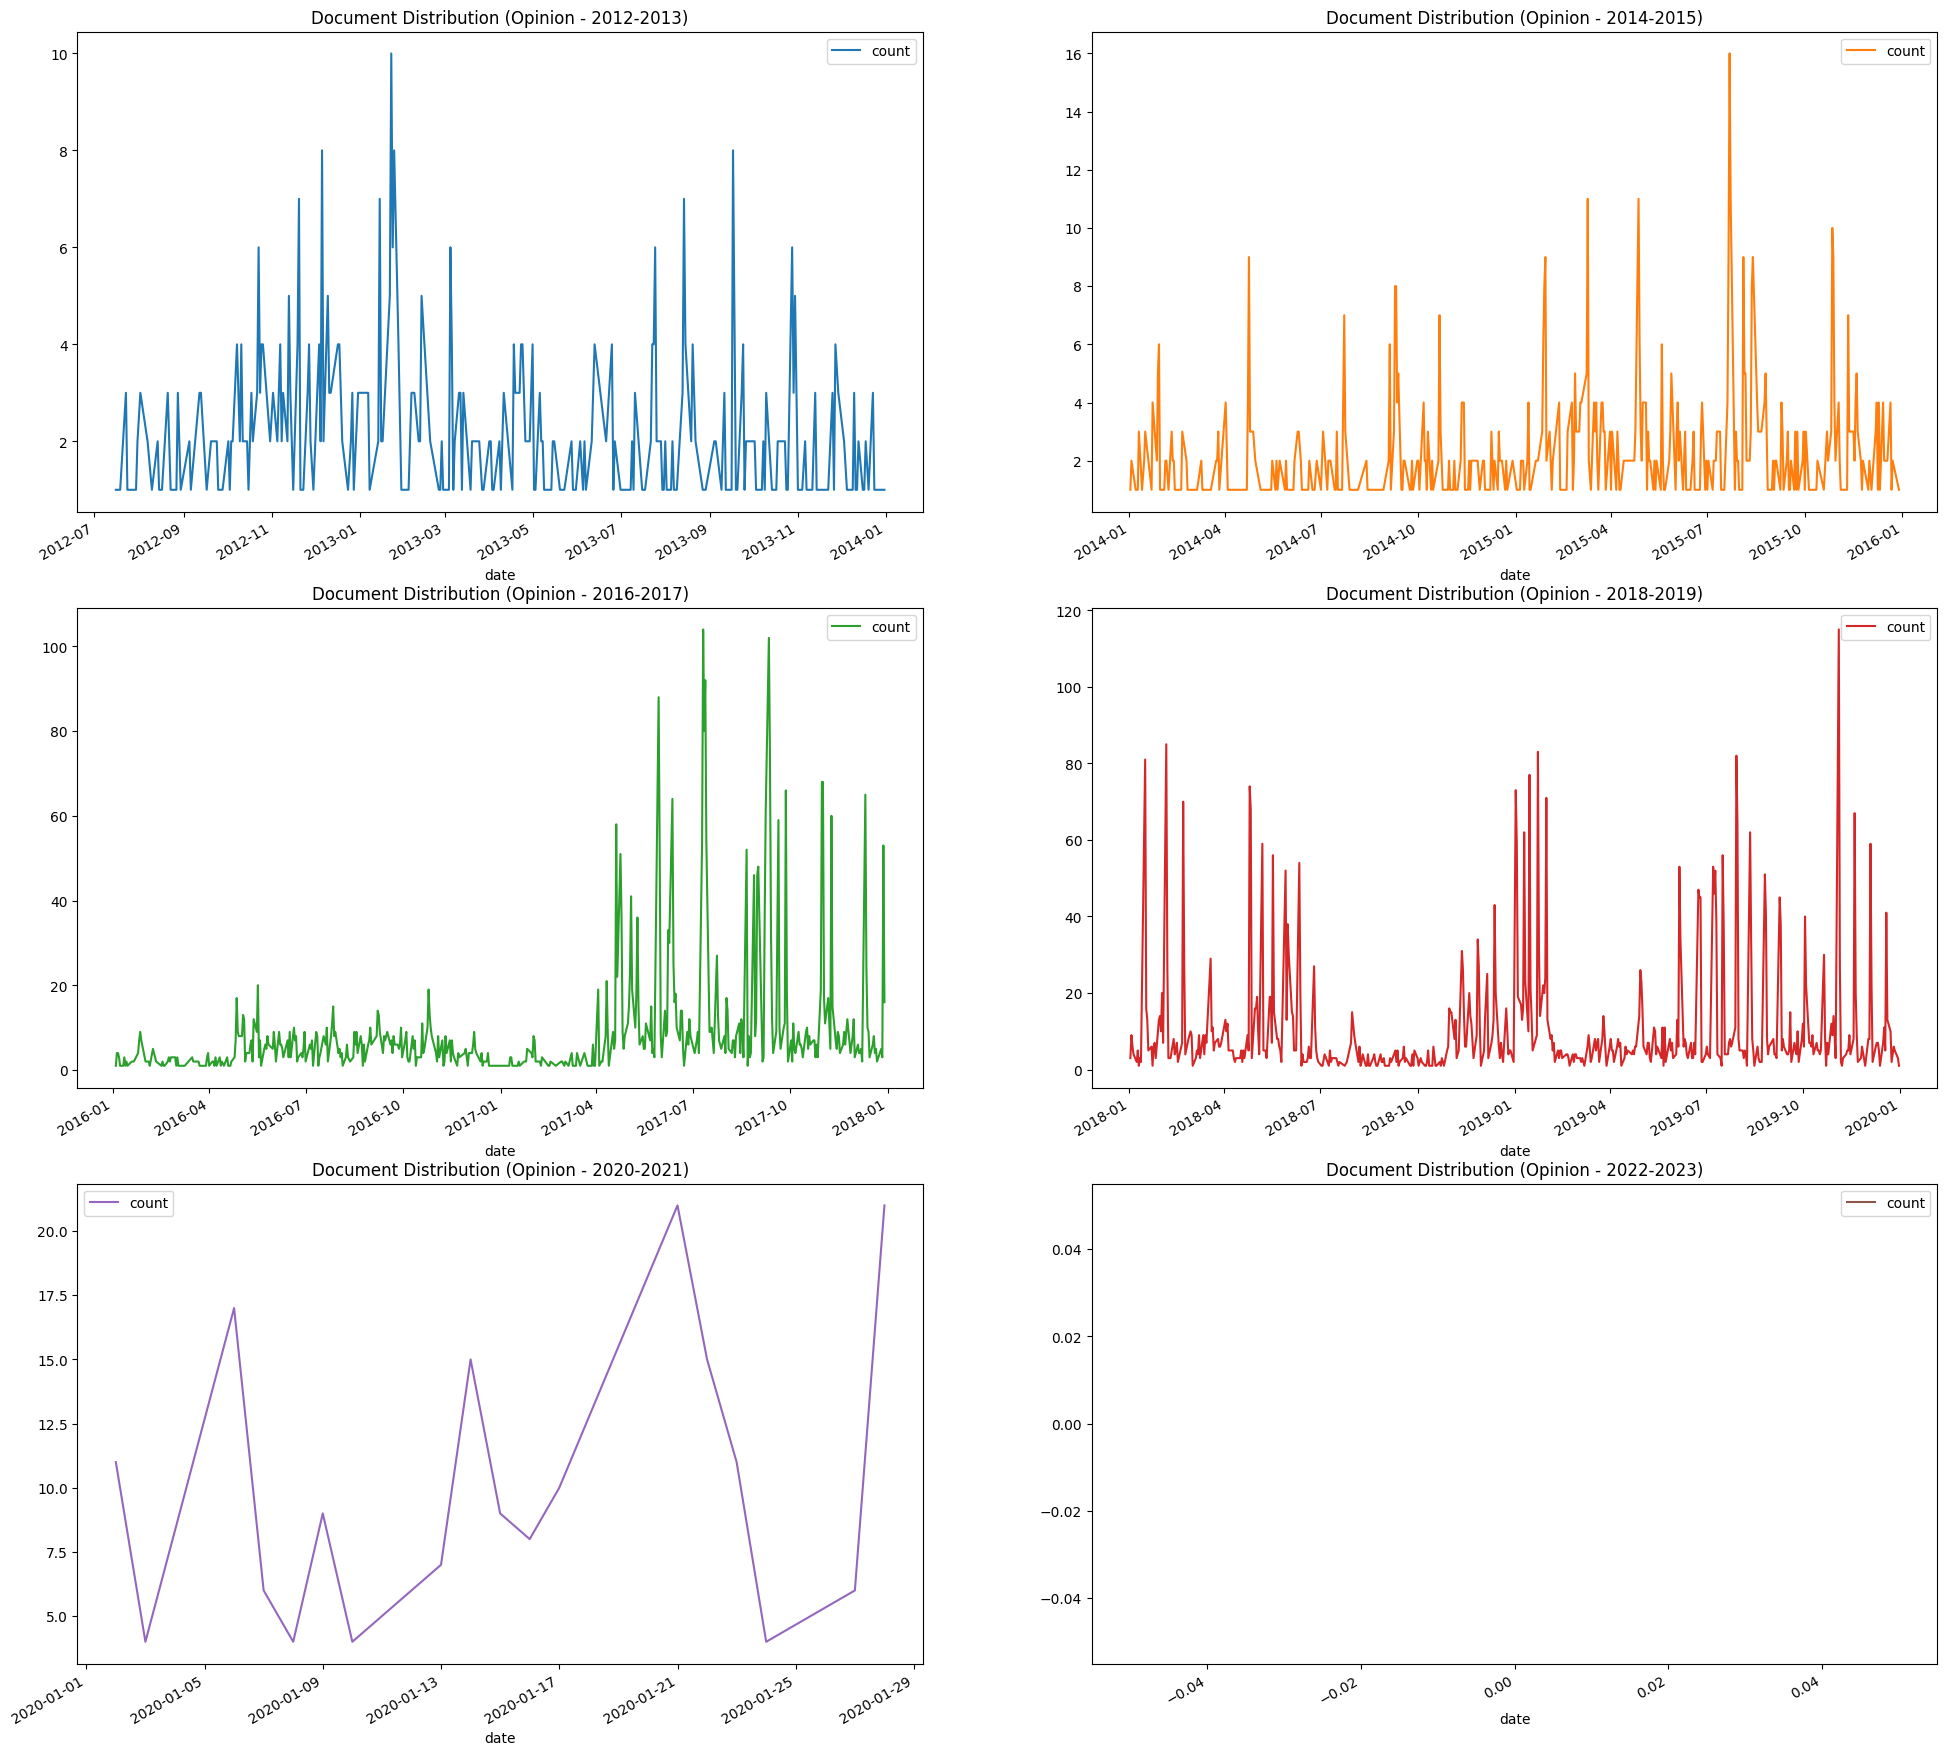

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 24))

_ = opinion_distribution[(opinion_distribution.index >= "2012-01-01") & (opinion_distribution.index <= "2013-12-31")].plot(
    kind="line",
    ax=axes[0, 0],
    color="tab:blue",
    title="Document Distribution (Opinion - 2012-2013)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2014-01-01") & (opinion_distribution.index <= "2015-12-31")].plot(
    kind="line",
    ax=axes[0, 1],
    color="tab:orange",
    title="Document Distribution (Opinion - 2014-2015)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2016-01-01") & (opinion_distribution.index <= "2017-12-31")].plot(
    kind="line",
    ax=axes[1, 0],
    color="tab:green",
    title="Document Distribution (Opinion - 2016-2017)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2018-01-01") & (opinion_distribution.index <= "2019-12-31")].plot(
    kind="line",
    ax=axes[1, 1],
    color="tab:red",
    title="Document Distribution (Opinion - 2018-2019)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2020-01-01") & (opinion_distribution.index <= "2021-12-31")].plot(
    kind="line",
    ax=axes[2, 0],
    color="tab:purple",
    title="Document Distribution (Opinion - 2020-2021)",
)

_ = opinion_distribution[(opinion_distribution.index >= "2022-01-01") & (opinion_distribution.index <= "2023-12-31")].plot(
    kind="line",
    ax=axes[2, 1],
    color="tab:brown",
    title="Document Distribution (Opinion - 2022-2023)",
)

In [26]:
total_words = sum(word_counter.values())
total_unique_words = len(word_counter)
total_unique_documents = len(df_aapl_us_equities_news_subset)
average_words_per_document = total_words / total_unique_documents

print(TEXT_START + "Total Words: " + TEXT_END + str(total_words))
print(TEXT_START + "Total Unique Words: " + TEXT_END + str(total_unique_words))
print(TEXT_START + "Total Documents: " + TEXT_END + str(total_unique_documents))
print(TEXT_START + "Total Unique Documents: " + TEXT_END + str(total_unique_documents))
print(TEXT_START + "Average Words per Document: " + TEXT_END + str(average_words_per_document))

Total Words: 11053361
Total Unique Words: 111983
Total Documents: 17648
Total Unique Documents: 17648
Average Words per Document: 626.3237194016319


# 99. Scratch